In [1]:
import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np
import random


class CartPoleEnv(gym.Env):
    """
    Description:
        A pole is attached by an un-actuated joint to a cart, which moves along
        a frictionless track. The pendulum starts upright, and the goal is to
        prevent it from falling over by increasing and reducing the cart's
        velocity.
    Source:
        This environment corresponds to the version of the cart-pole problem
        described by Barto, Sutton, and Anderson
    Observation:
        Type: Box(4)
        Num     Observation               Min                     Max
        0       Cart Position             -4.8                    4.8
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
        3       Pole Angular Velocity     -Inf                    Inf
    Actions:
        Type: Discrete(2)
        Num   Action
        0     Push cart to the left
        1     Push cart to the right
        Note: The amount the velocity that is reduced or increased is not
        fixed; it depends on the angle the pole is pointing. This is because
        the center of gravity of the pole increases the amount of energy needed
        to move the cart underneath it
    Reward:
        Reward is 1 for every step taken, including the termination step
    Starting State:
        All observations are assigned a uniform random value in [-0.05..0.05]
    Episode Termination:
        Pole Angle is more than 12 degrees.
        Cart Position is more than 2.4 (center of the cart reaches the edge of
        the display).
        Episode length is greater than 200.
        Solved Requirements:
        Considered solved when the average return is greater than or equal to
        195.0 over 100 consecutive trials.
    """

    #metadata = {"render.modes": ["human", "rgb_array"], "video.frames_per_second": 50}

    def __init__(self):
        self.gravity = 9.8
        self.masscart = 1.0
        self.masspole = 0.1
        self.total_mass = self.masspole + self.masscart
        self.length = 0.5  # actually half the pole's length
        self.polemass_length = self.masspole * self.length
        self.force_mag = 10.0
        self.tau = 0.02  # seconds between state updates
        self.kinematics_integrator = "euler"

        # Angle at which to fail the episode
        #self.theta_threshold_radians = 12 * 2 * math.pi / 360
        #self.x_threshold = 2.4

        # Angle limit set to 2 * theta_threshold_radians so failing observation
        # is still within bounds.
        high = np.array(
            [
                160,
                10,
                 10,
                10,
            ],
            dtype=np.float32,
        )

        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(-high, high, dtype=np.float32)

        self.seed()
        self.viewer = None
        self.state = None

        self.steps_beyond_done = None

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        err_msg = "%r (%s) invalid" % (action, type(action))
        assert self.action_space.contains(action), err_msg
        
        
        
        # For the interested reader:
        # https://coneural.org/florian/papers/05_cart_pole.pdf
        

        r=random.choices(t)
        r[0][0], r[0][1], r[0][2], r[0][2] = self.state
        r[0][1]=r[0][1]+1
        self.state = (r[0][0], r[0][1], r[0][2], r[0][2])

        done=bool(r[0][0]==1)

        if not done:
            reward = 1.0
        elif self.steps_beyond_done is None:
            # Pole just fell!
            self.steps_beyond_done = 0
            reward = 1.0
        
        return np.array(self.state, dtype=np.float32), reward, done, {}

    def reset(self):
        self.state = self.np_random.uniform(low=-0.05, high=0.05, size=(4,))
        self.steps_beyond_done = None
        return np.array(self.state, dtype=np.float32)


In [17]:
"""
Classic cart-pole system implemented by Rich Sutton et al.
Copied from http://incompleteideas.net/sutton/book/code/pole.c
permalink: https://perma.cc/C9ZM-652R
"""

import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np
import random


class CartPoleEnv1(gym.Env):
    """
    Description:
        A pole is attached by an un-actuated joint to a cart, which moves along
        a frictionless track. The pendulum starts upright, and the goal is to
        prevent it from falling over by increasing and reducing the cart's
        velocity.
    Source:
        This environment corresponds to the version of the cart-pole problem
        described by Barto, Sutton, and Anderson
    Observation:
        Type: Box(4)
        Num     Observation               Min                     Max
        0       Cart Position             -4.8                    4.8
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
        3       Pole Angular Velocity     -Inf                    Inf
    Actions:
        Type: Discrete(2)
        Num   Action
        0     Push cart to the left
        1     Push cart to the right
        Note: The amount the velocity that is reduced or increased is not
        fixed; it depends on the angle the pole is pointing. This is because
        the center of gravity of the pole increases the amount of energy needed
        to move the cart underneath it
    Reward:
        Reward is 1 for every step taken, including the termination step
    Starting State:
        All observations are assigned a uniform random value in [-0.05..0.05]
    Episode Termination:
        Pole Angle is more than 12 degrees.
        Cart Position is more than 2.4 (center of the cart reaches the edge of
        the display).
        Episode length is greater than 200.
        Solved Requirements:
        Considered solved when the average return is greater than or equal to
        195.0 over 100 consecutive trials.
    """

    #metadata = {"render.modes": ["human", "rgb_array"], "video.frames_per_second": 50}

    def __init__(self):
        self.gravity = 9.8
        self.masscart = 1.0
        self.masspole = 0.1
        self.total_mass = self.masspole + self.masscart
        self.length = 0.5  # actually half the pole's length
        self.polemass_length = self.masspole * self.length
        self.force_mag = 10.0
        self.tau = 0.02  # seconds between state updates
        self.kinematics_integrator = "euler"

        # Angle at which to fail the episode
        self.theta_threshold_radians = 12 * 2 * math.pi / 360
        self.x_threshold = 2.4

        # Angle limit set to 2 * theta_threshold_radians so failing observation
        # is still within bounds.
        high = np.array(
            [
                1,
                100,
                100,
                100,
            ],
            dtype=np.float32,
        )

        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(-high, high, dtype=np.float32)

        self.seed()
        self.viewer = None
        self.state = None

        self.steps_beyond_done = None

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        err_msg = "%r (%s) invalid" % (action, type(action))
        assert self.action_space.contains(action), err_msg

        x, x_dot, theta, theta_dot = self.state
        i=1
         
        # For the interested reader:
        # https://coneural.org/florian/papers/05_cart_pole.pdf
        
        #t=[1,5,4]
        reward=0
        a=5
        b=5
        
        
        #for i in range(20):
        
        if random.random()>math.exp(-a/b):
            x=0
            x_dot = 3
            theta = 3
            theta_dot = 4
            reward = -1
            b+=1
            a-=1
            
            
            
            
            
        else:
            x = 1
            x_dot =x_dot+i
            theta = 3
            theta_dot = 4
            
            
            
            i+=1
            reward = 1
        #if self.kinematics_integrator == "euler":
        #x = t[0][0]
        
          
        self.state = (x, x_dot, theta, theta_dot)

        done = bool(x_dot>40)
        
        a=a
        b=b
       
        

        return np.array(self.state, dtype=np.float32), reward, done, {}


    def reset(self):
        
        #self.state = self.np_random.randint(low=0, high=1, size=(4,))
        #self.state = (1,2,3,3),(1,2,3,3)
      
       self.state = self.np_random.uniform(low=-0.05, high=0.05, size=(4,))
       self.steps_beyond_done = None
       return np.array(self.state, dtype=np.float32)

    

In [20]:
"""
Classic cart-pole system implemented by Rich Sutton et al.
Copied from http://incompleteideas.net/sutton/book/code/pole.c
permalink: https://perma.cc/C9ZM-652R
"""

import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np
import random


class CartPoleEnv3(gym.Env):
    """
    Description:
        A pole is attached by an un-actuated joint to a cart, which moves along
        a frictionless track. The pendulum starts upright, and the goal is to
        prevent it from falling over by increasing and reducing the cart's
        velocity.
    Source:
        This environment corresponds to the version of the cart-pole problem
        described by Barto, Sutton, and Anderson
    Observation:
        Type: Box(4)
        Num     Observation               Min                     Max
        0       Cart Position             -4.8                    4.8
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
        3       Pole Angular Velocity     -Inf                    Inf
    Actions:
        Type: Discrete(2)
        Num   Action
        0     Push cart to the left
        1     Push cart to the right
        Note: The amount the velocity that is reduced or increased is not
        fixed; it depends on the angle the pole is pointing. This is because
        the center of gravity of the pole increases the amount of energy needed
        to move the cart underneath it
    Reward:
        Reward is 1 for every step taken, including the termination step
    Starting State:
        All observations are assigned a uniform random value in [-0.05..0.05]
    Episode Termination:
        Pole Angle is more than 12 degrees.
        Cart Position is more than 2.4 (center of the cart reaches the edge of
        the display).
        Episode length is greater than 200.
        Solved Requirements:
        Considered solved when the average return is greater than or equal to
        195.0 over 100 consecutive trials.
    """

    #metadata = {"render.modes": ["human", "rgb_array"], "video.frames_per_second": 50}

    def __init__(self):
        self.gravity = 9.8
        self.masscart = 1.0
        self.masspole = 0.1
        self.total_mass = self.masspole + self.masscart
        self.length = 0.5  # actually half the pole's length
        self.polemass_length = self.masspole * self.length
        self.force_mag = 1.0
        self.tau = 0.02  # seconds between state updates
        self.kinematics_integrator = "euler"

        # Angle at which to fail the episode
        self.theta_threshold_radians = 12 * 2 * math.pi / 360
        self.x_threshold = 2.4

        # Angle limit set to 2 * theta_threshold_radians so failing observation
        # is still within bounds.
        high = np.array(
            [
                1,
                100,
                100,
                100,
            ],
            dtype=np.float32,
        )

        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(-high, high, dtype=np.float32)

        self.seed()
        self.viewer = None
        self.state = None

        self.steps_beyond_done = None

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        err_msg = "%r (%s) invalid" % (action, type(action))
        assert self.action_space.contains(action), err_msg

        x, x_dot, theta, theta_dot = self.state
        force = self.force_mag if action == 1 else -self.force_mag
        d=1
         
        # For the interested reader:
        # https://coneural.org/florian/papers/05_cart_pole.pdf
        
        #t=[1,5,4]
        reward=0
        a=35
        b=50
        k=0
        
        #for i in range(20):
        
        
        if random.random()<math.exp(-a/b)*.63:
            x = 1
            d+=1*force
            x_dot =x_dot+d
            theta = 3
            theta_dot = 4
            k+=1
            d+=1*force
            
            
            
            reward = 1+d
            
            
           
            
        else:
            
            x=0
            x_dot = x_dot+d
            theta = 3
            theta_dot = 4
            reward = -(1+d)
            
            
            b+=1
            a-=1
        #if self.kinematics_integrator == "euler":
        #x = t[0][0]
        
          
        self.state = (x, x_dot, theta, theta_dot)

        done = bool(x_dot>100)
        
        a=a
        b=b
       
        

        return np.array(self.state, dtype=np.float32), reward, done, {}


    def reset(self):
        
        #self.state = self.np_random.randint(low=0, high=1, size=(4,))
       self.state = (1),(1),(1),(1)
      
       #self.state = self.np_random.uniform(low=0, high=0, size=(4,))
       #self.state=self.np.random.uniform(size = (4,), low = 0, high = 1)
       self.steps_beyond_done = None
       return np.array(self.state, dtype=np.float32)

    

In [13]:
"""
Classic cart-pole system implemented by Rich Sutton et al.
Copied from http://incompleteideas.net/sutton/book/code/pole.c
permalink: https://perma.cc/C9ZM-652R
"""

import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np


class CartPoleEnv2(gym.Env):
    """
    Description:
        A pole is attached by an un-actuated joint to a cart, which moves along
        a frictionless track. The pendulum starts upright, and the goal is to
        prevent it from falling over by increasing and reducing the cart's
        velocity.
    Source:
        This environment corresponds to the version of the cart-pole problem
        described by Barto, Sutton, and Anderson
    Observation:
        Type: Box(4)
        Num     Observation               Min                     Max
        0       Cart Position             -4.8                    4.8
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
        3       Pole Angular Velocity     -Inf                    Inf
    Actions:
        Type: Discrete(2)
        Num   Action
        0     Push cart to the left
        1     Push cart to the right
        Note: The amount the velocity that is reduced or increased is not
        fixed; it depends on the angle the pole is pointing. This is because
        the center of gravity of the pole increases the amount of energy needed
        to move the cart underneath it
    Reward:
        Reward is 1 for every step taken, including the termination step
    Starting State:
        All observations are assigned a uniform random value in [-0.05..0.05]
    Episode Termination:
        Pole Angle is more than 12 degrees.
        Cart Position is more than 2.4 (center of the cart reaches the edge of
        the display).
        Episode length is greater than 200.
        Solved Requirements:
        Considered solved when the average return is greater than or equal to
        195.0 over 100 consecutive trials.
    """

    #metadata = {"render.modes": ["human", "rgb_array"], "video.frames_per_second": 50}

    def __init__(self):
        self.gravity = 9.8
        self.masscart = 1.0
        self.masspole = 0.1
        self.total_mass = self.masspole + self.masscart
        self.length = 0.5  # actually half the pole's length
        self.polemass_length = self.masspole * self.length
        self.force_mag = 10.0
        self.tau = 0.02  # seconds between state updates
        self.kinematics_integrator = "euler"

        # Angle at which to fail the episode
        self.theta_threshold_radians = 12 * 2 * math.pi / 360
        self.x_threshold = 2.4

        # Angle limit set to 2 * theta_threshold_radians so failing observation
        # is still within bounds.
        high = np.array(
            [
                self.x_threshold * 2,
                np.finfo(np.float32).max,
                self.theta_threshold_radians * 2,
                np.finfo(np.float32).max,
            ],
            dtype=np.float32,
        )

        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(-high, high, dtype=np.float32)

        self.seed()
        self.viewer = None
        self.state = None

        self.steps_beyond_done = None

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        #err_msg = "%r (%s) invalid" % (action, type(action))
        #assert self.action_space.contains(action), err_msg

        x, x_dot, theta, theta_dot = self.state
        force = self.force_mag if action == 1 else -self.force_mag
        costheta = math.cos(theta)
        sintheta = math.sin(theta)

        # For the interested reader:
        # https://coneural.org/florian/papers/05_cart_pole.pdf
        temp = (
            force + self.polemass_length * theta_dot ** 2 * sintheta
        ) / self.total_mass
        thetaacc = (self.gravity * sintheta - costheta * temp) / (
            self.length * (4.0 / 3.0 - self.masspole * costheta ** 2 / self.total_mass)
        )
        xacc = temp - self.polemass_length * thetaacc * costheta / self.total_mass

        if self.kinematics_integrator == "euler":
            x = x + self.tau * x_dot
            x_dot = x_dot + self.tau * xacc
            theta = theta + self.tau * theta_dot
            theta_dot = theta_dot + self.tau * thetaacc
        else:  # semi-implicit euler
            x_dot = x_dot + self.tau * xacc
            x = x + self.tau * x_dot
            theta_dot = theta_dot + self.tau * thetaacc
            theta = theta + self.tau * theta_dot

        self.state = (x, x_dot, theta, theta_dot)

        done = bool(
            x < -self.x_threshold
            or x > self.x_threshold
            or theta < -self.theta_threshold_radians
            or theta > self.theta_threshold_radians
        )

        if not done:
            reward = 1.0
        elif self.steps_beyond_done is None:
            # Pole just fell!
            self.steps_beyond_done = 0
            reward = 1.0
        else:
            if self.steps_beyond_done == 0:
                logger.warn(
                    "You are calling 'step()' even though this "
                    "environment has already returned done = True. You "
                    "should always call 'reset()' once you receive 'done = "
                    "True' -- any further steps are undefined behavior."
                )
            self.steps_beyond_done += 1
            reward = 0.0

        return np.array(self.state, dtype=np.float32), reward, done, {}

    def reset(self):
        self.state = self.np_random.uniform(low=0.0, high=0.05, size=(4,))
        self.steps_beyond_done = None
        return np.array(self.state, dtype=np.float32)


In [14]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np


class DeepQNetwork(nn.Module):
    def __init__(self, lr, input_dims, fc1_dims, fc2_dims,
                 n_actions):
        super(DeepQNetwork, self).__init__()
        self.input_dims = input_dims
        self.fc1_dims = fc1_dims
        self.fc2_dims = fc2_dims
        self.n_actions = n_actions
        self.fc1 = nn.Linear(*self.input_dims, self.fc1_dims)
        self.fc2 = nn.Linear(self.fc1_dims, self.fc2_dims)
        self.fc3 = nn.Linear(self.fc2_dims, self.n_actions)

        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.loss = nn.MSELoss()
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        actions = self.fc3(x)

        return actions


class Agent:
    def __init__(self, gamma, epsilon, lr, input_dims, batch_size, n_actions,
                 max_mem_size=100000, eps_end=0.05, eps_dec=5e-4):
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_min = eps_end
        self.eps_dec = eps_dec
        self.lr = lr
        self.action_space = [i for i in range(n_actions)]
        self.mem_size = max_mem_size
        self.batch_size = batch_size
        self.mem_cntr = 0
        self.iter_cntr = 0
        self.replace_target = 100

        self.Q_eval = DeepQNetwork(lr, n_actions=n_actions,
                                   input_dims=input_dims,
                                   fc1_dims=256, fc2_dims=256)
        self.state_memory = np.zeros((self.mem_size, *input_dims),
                                     dtype=np.float32)
        self.new_state_memory = np.zeros((self.mem_size, *input_dims),
                                         dtype=np.float32)
        self.action_memory = np.zeros(self.mem_size, dtype=np.int32)
        self.reward_memory = np.zeros(self.mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)

    def store_transition(self, state, action, reward, state_, terminal):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = terminal

        self.mem_cntr += 1

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            state = T.tensor([observation]).to(self.Q_eval.device)
            actions = self.Q_eval.forward(state)
            action = T.argmax(actions).item()
        else:
            action = np.random.choice(self.action_space)

        return action

    def learn(self):
        if self.mem_cntr < self.batch_size:
            return

        self.Q_eval.optimizer.zero_grad()

        max_mem = min(self.mem_cntr, self.mem_size)

        batch = np.random.choice(max_mem, self.batch_size, replace=False)
        batch_index = np.arange(self.batch_size, dtype=np.int32)

        state_batch = T.tensor(self.state_memory[batch]).to(self.Q_eval.device)
        new_state_batch = T.tensor(
                self.new_state_memory[batch]).to(self.Q_eval.device)
        action_batch = self.action_memory[batch]
        reward_batch = T.tensor(
                self.reward_memory[batch]).to(self.Q_eval.device)
        terminal_batch = T.tensor(
                self.terminal_memory[batch]).to(self.Q_eval.device)

        q_eval = self.Q_eval.forward(state_batch)[batch_index, action_batch]
        q_next = self.Q_eval.forward(new_state_batch)
        q_next[terminal_batch] = 0.0

        q_target = reward_batch + self.gamma*T.max(q_next, dim=1)[0]

        loss = self.Q_eval.loss(q_target, q_eval).to(self.Q_eval.device)
        loss.backward()
        self.Q_eval.optimizer.step()

        self.iter_cntr += 1
        self.epsilon = self.epsilon - self.eps_dec \
            if self.epsilon > self.eps_min else self.eps_min

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import gym

def plotLearning(x, scores, epsilons,lines=None):
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, epsilons, color="C0")
    ax.set_xlabel("Game", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
	    running_avg[t] = np.mean(scores[max(0, t-20):(t+1)])

    ax2.scatter(x, running_avg, color="C1")
    #ax2.xaxis.tick_top()
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    #ax2.set_xlabel('x label 2', color="C1")
    ax2.set_ylabel('Score', color="C1")
    #ax2.xaxis.set_label_position('top')
    ax2.yaxis.set_label_position('right')
    #ax2.tick_params(axis='x', colors="C1")
    ax2.tick_params(axis='y', colors="C1")

    if lines is not None:
        for line in lines:
            plt.axvline(x=line)

   

episode  0 score -66.00 average score -66.00 epsilon 0.98
episode  1 score -120.00 average score -93.00 epsilon 0.93
episode  2 score -80.00 average score -88.67 epsilon 0.88
episode  3 score -24.00 average score -72.50 epsilon 0.83
episode  4 score -80.00 average score -74.00 epsilon 0.78
episode  5 score -80.00 average score -75.00 epsilon 0.74
episode  6 score -56.00 average score -72.29 epsilon 0.69
episode  7 score -32.00 average score -67.25 epsilon 0.65
episode  8 score -56.00 average score -66.00 epsilon 0.60
episode  9 score -48.00 average score -64.20 epsilon 0.55
episode  10 score -48.00 average score -62.73 epsilon 0.51
episode  11 score -24.00 average score -59.50 epsilon 0.46
episode  12 score -24.00 average score -56.77 epsilon 0.42
episode  13 score -56.00 average score -56.71 epsilon 0.38
episode  14 score -48.00 average score -56.13 epsilon 0.34
episode  15 score -80.00 average score -57.62 epsilon 0.29
episode  16 score -16.00 average score -55.18 epsilon 0.25
episod

episode  140 score -16.00 average score -14.64 epsilon 0.01
episode  141 score -8.00 average score -14.86 epsilon 0.01
episode  142 score 0.00 average score -14.30 epsilon 0.01
episode  143 score -32.00 average score -14.46 epsilon 0.01
episode  144 score -10.00 average score -14.72 epsilon 0.01
episode  145 score 8.00 average score -14.94 epsilon 0.01
episode  146 score 48.00 average score -13.98 epsilon 0.01
episode  147 score 24.00 average score -13.32 epsilon 0.01
episode  148 score -8.00 average score -13.38 epsilon 0.01
episode  149 score 14.00 average score -12.68 epsilon 0.01
episode  150 score -26.00 average score -12.94 epsilon 0.01
episode  151 score 38.00 average score -12.94 epsilon 0.01
episode  152 score 8.00 average score -13.02 epsilon 0.01
episode  153 score 0.00 average score -13.10 epsilon 0.01
episode  154 score -8.00 average score -13.02 epsilon 0.01
episode  155 score -2.00 average score -12.88 epsilon 0.01
episode  156 score -24.00 average score -13.04 epsilon 0

episode  279 score -24.00 average score -13.30 epsilon 0.01
episode  280 score -56.00 average score -14.18 epsilon 0.01
episode  281 score -16.00 average score -13.86 epsilon 0.01
episode  282 score -48.00 average score -14.34 epsilon 0.01
episode  283 score -10.00 average score -14.36 epsilon 0.01
episode  284 score -10.00 average score -13.90 epsilon 0.01
episode  285 score -50.00 average score -14.40 epsilon 0.01
episode  286 score -40.00 average score -14.88 epsilon 0.01
episode  287 score 22.00 average score -14.74 epsilon 0.01
episode  288 score -2.00 average score -14.84 epsilon 0.01
episode  289 score -48.00 average score -15.16 epsilon 0.01
episode  290 score -72.00 average score -16.04 epsilon 0.01
episode  291 score 6.00 average score -16.14 epsilon 0.01
episode  292 score 24.00 average score -15.58 epsilon 0.01
episode  293 score -40.00 average score -15.58 epsilon 0.01
episode  294 score -32.00 average score -15.58 epsilon 0.01
episode  295 score 16.00 average score -14.86

episode  418 score -40.00 average score -12.24 epsilon 0.01
episode  419 score -40.00 average score -12.48 epsilon 0.01
episode  420 score 24.00 average score -11.90 epsilon 0.01
episode  421 score -8.00 average score -11.58 epsilon 0.01
episode  422 score -10.00 average score -11.84 epsilon 0.01
episode  423 score 8.00 average score -11.98 epsilon 0.01
episode  424 score 6.00 average score -12.24 epsilon 0.01
episode  425 score 16.00 average score -11.90 epsilon 0.01
episode  426 score -32.00 average score -11.34 epsilon 0.01
episode  427 score -40.00 average score -11.18 epsilon 0.01
episode  428 score -24.00 average score -11.24 epsilon 0.01
episode  429 score -10.00 average score -11.42 epsilon 0.01
episode  430 score 0.00 average score -11.66 epsilon 0.01
episode  431 score 24.00 average score -11.42 epsilon 0.01
episode  432 score -48.00 average score -12.38 epsilon 0.01
episode  433 score 6.00 average score -12.38 epsilon 0.01
episode  434 score -24.00 average score -12.46 epsil

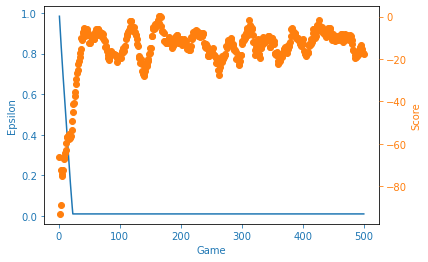

In [21]:
import gym
#from simple_dqn_torch_2020 import Agent
#from utils import plotLearning
import numpy as np

#t=[[0,5,4],[0,4,4],[0,3,4],[0,3,4],[0,3,4],[1,7,4],[1,8,4],[0,3,4],[0,8,4]]
if __name__ == '__main__':
    #env = gym.make('CartPole-v1')
    env=CartPoleEnv3()
    agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=2, eps_end=0.01,
                  input_dims=[4], lr=0.001)
    scores, eps_history = [], []
    n_games =500
    x_dot=20
    #dot=[[1,20],[1,21],[1,22],[1,24],[1,25],[1,20],[1,21],[1,22],[1,24],[1,25],[1,20],[1,21],[1,22],[1,24],[1,25],[1,20],[1,21],[1,22],[1,24],[1,25]]
    
    for i in range(n_games):
        score = 0
        done = False
        observation = env.reset()
        #observation=env.step(action)
        
        while not done:
            
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward, 
                                    observation_, done)
            agent.learn()
            observation = observation_
        scores.append(score)
        eps_history.append(agent.epsilon)
        
        avg_score = np.mean(scores[-100:])

        print('episode ', i, 'score %.2f' % score,
                'average score %.2f' % avg_score,
                'epsilon %.2f' % agent.epsilon)
    x = [i+1 for i in range(n_games)]
    #filename = 'lunar_lander.png'
    plotLearning(x, scores, eps_history)

In [ ]:
import random
t=[[1,5,4],[1,4,4],[1,3,4],[1,3,4],[1,3,4],[1,7,4],[1,8,4],[1,3,4],[1,8,4]]
for i in range(len(t)):
  r=random.choices(t)
  if random.random()<.5:
        if r[0][0]==1 and random.random()<math.exp(-1):
          print(r[0][1])
  else:
    print('wrong')


In [ ]:
r=math.exp(-1)
print(r)

In [ ]:
t=[[1,5,4],[1,4,4],[1,3,4],[1,3,4],[1,3,4],[1,7,4],[1,8,4],[1,3,4],[1,8,4]]
for i in range(len(t)):
    x=t[i][0]+5
    t[i][0]=x
    print(t[i][0])
    

In [ ]:
t=[[1,5,4],[1,4,4],[1,3,4],[1,3,4],[1,3,4],[0,7,4],[1,8,4],[1,3,4],[1,8,4]]

a=0
for i in range(len(t)):
  if t[i][0]==1:
     a-=1
    
    
print(a)
    

In [ ]:
 a=0
         for i in range(len(t)):
           if t[i][0]==1:
              a+=1
         b=9-a
        

In [ ]:
np.zeros((5,3), dtype=int)

In [ ]:
[3]*[3]

In [ ]:
%history -g -f MDP_IOT


In [ ]:
%history -g

In [ ]:
state = np_random.uniform(low=0, high=1, size=(4,))


In [ ]:
for i in range(100):
 print(random.random())